In [ ]:
import pandas as pd
import matplotlib
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'would', 'could', 'may', 'one', 'I', 'It', 'but', 'also', 'this', 'that', 'they', 'it', 'The', 'But', 'And', 'A', 'We', 'They', 'This', 'That', 'In', 'These', 'even', 'There', 'As', 'If', 'He', 'us', 'For'])
import pandas as pd
import numpy as np
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
Downsizing_df = pd.read_csv("/gdrive/My Drive/Neoliber_2020.csv")

In [ ]:
Downsizing_df

,Unnamed: 0,author,body,date,title,url,year,month,day
0,0.0,Matt Kilcoyne,With the release of the details of the make-up...,2020-05-04,WHITHER THE ECONOMISTS WHILE THE ECONOMY WITHE...,https://www.adamsmith.org/news/whither-the-eco...,2020.0,5.0,4.0
1,1.0,Madsen Pirie,Cost-benefit analysis is a useful tool for wor...,2020-05-10,WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COV...,https://www.adamsmith.org/blog/were-missing-co...,2020.0,5.0,10.0
2,2.0,Dr Smith,I have been asked how medicine is practised di...,2020-04-29,MEDICINE DURING COVID,https://www.adamsmith.org/despatches/medicine-...,2020.0,4.0,29.0
3,3.0,Lance Forman,The Government is going about supporting the e...,2020-03-19,COVID19: HOW TO DEAL WITH BUSINESS COLLAPSE AN...,https://www.adamsmith.org/blog/covid19-how-do-...,2020.0,3.0,19.0
4,4.0,Eamonn Butler,"Too late now, but I think I understand why min...",2020-04-27,WHY THE POLICE GOT IT SO WRONG ON ENFORCING CO...,https://www.adamsmith.org/blog/why-the-police-...,2020.0,4.0,27.0
...,...,...,...,...,...,...,...,...,...
781,405.0,Andrew McIndoe,Our most memorable heroes are forged through c...,2020-05-15,"When People See Nonprofits Persevering, They’l...",https://www.heritage.org/jobs-and-labor/commen...,2020.0,5.0,15.0
782,406.0,Tommy Binion,The news has been full of stories on SCOTUS no...,2020-10-13,The Confirmation of Amy Coney Barrett: Opening...,https://www.heritage.org/political-process/com...,2020.0,10.0,13.0
783,407.0,Kay C. James,When the nongovernmental National Coronavirus ...,2020-04-22,COVID-19 Crisis Has Re-Ignited a Sense of Comm...,https://www.heritage.org/civil-society/comment...,2020.0,4.0,22.0
784,408.0,"Kevin Pham, MD",America’s coronavirus testing rates have emerg...,2020-04-26,COVID-19 Testing and the Way Forward on Resumi...,https://www.heritage.org/public-health/comment...,2020.0,4.0,26.0


In [ ]:
# Σβήνω κάποιες στήλες διότι δεν μου προσδίδουν καμία χρήσιμη πληροφορία 

Downsizing_df = Downsizing_df.drop('Unnamed: 0', axis = 1)

In [ ]:
Downsizing_df = Downsizing_df[Downsizing_df.body.notnull()]

In [ ]:
Downsizing_df.shape

(785, 8)

In [ ]:
Downsizing_df['body'][16]

'The ASI’s latest paper, written by ASI Head of Research Matthew Lesh, makes the case for decentralising  COVID-19 diagnostic testing in the United Kingdom:                COVID-19 is the biggest public health emergency in modern history. There have already been over 875,000 confirmed cases and 43,500 deaths worldwide. These numbers are expected to grow exponentially in the coming weeks, potentially resulting in millions of cases and hundreds of thousands of deaths.     The United Kingdom is experiencing a substantial growth in cases and deaths. Over 2,350 people confirmed to have died after contracting the virus. This number is doubling approximately every 3 days, putting the UK on a similar trajectory to the worst affected regions in the world.    Testing is a key tool to combat infectious diseases. It allows doctors to identify the needs of patients, public health authorities to trace and isolate cases to minimise spread, and epidemiologists to track the spread of an outbreak. It is

In [ ]:
Downsizing_df['title'][1]

"WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COVID19 DISCUSSION"

In [ ]:
print(Downsizing_df['title'][785])

New COVID-19 Findings Confirm What We Have Learned Since the Beginning. A Targeted Response Is More Important Than Ever.


Concordances

In [ ]:
#edw prwta epilegoume to keyword  kai meta poses lexeis theloume girw apo to keyword

In [ ]:
word2find = input("What word do you want collocates for? ").lower() # AsSa
#name2find = input ("Type the name of the politician?")
context = input ("How much content do you want?")
contextInt = int(context)

What word do you want collocates for? masks
How much content do you want?20


In [ ]:
def makeConc(word2conc,list2FindIn,context2Use,concList):

    end = len(list2FindIn)
    for location in range(end):
        pattern = re.compile(word2conc)
        if pattern.match(list2FindIn[location]):
#        if list2FindIn[location] == word2conc:

            # Here we check whether we are at the very beginning or end
            if (location - context2Use) < 0:
                beginCon = 0
            else:
                beginCon = location - context2Use
                
            if (location + context2Use) > end:
                endCon = end
            else:
                endCon = location + context2Use + 1
                
            theContext = (list2FindIn[beginCon:endCon])
            concordanceLine = ' '.join(theContext)
            # print(str(location) + ": " + concordanceLine)
            concList.append(str(location) + ": " + concordanceLine)

In [ ]:
#edw emfanizontai ta apotelesmata poy tha koitaxoume

In [ ]:
theRowConc = []
for index, row in Downsizing_df.iterrows():
    makeConc(word2find, word_tokenize(row['body']), int(context), theRowConc) #here you can change the body to other column
    if  len(theRowConc) > 0:
        print(index, theRowConc)
    theRowConc = []

2 ['132: all day in stifling heat with waterproof clothes that do not breathe . You can barely hear when we talk masks and visors . Some put their names on the front of their gowns , however , most people are more', '174: by their eyes than you would think . The intermediate area is a half dirty layer . Staff wear face masks to protect against aerosols generated from the patients leaking out when doors are opened . We also wear scrubs and']
50 ['288: even dedicated scientists are struggling to show the effectiveness of even simple interventions . Perhaps the most obvious is face masks , where we have seen multiple revisions of the scientific advice . We also see confusion about whether we should']
143 ['573: testing plays only part of a national response to a dangerous virus ( travel controls , clinical diagnoses , face masks , social distancing et alia also play their parts ) , but the speed by which a nation develops an']
186 ['539: ” , but the guidelines are set by Public Health Eng

In [ ]:
def makeCollocates(word2coll,list2FindIn,context2Use,collist):
    end = len(list2FindIn)
    counter = 0
    theCollocates = []
    for word in list2FindIn:
        pattern = re.compile(word2coll)
        if pattern.match(word):       
#        if word == word2coll: # This checks to see if the word is what we want
            for i in range(context2Use):
                if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                    theCollocates.append(list2FindIn[(counter - (i + 1))]) # This adds words before
                if (counter + (i + 1)) < end: # This checks that we aren't at the end
                    theCollocates.append(list2FindIn[(counter + (i + 1))]) # This adds words after
        counter = counter + 1
    if len(theCollocates) > 0:
        collist.append(theCollocates)
    
#print(theCollocates[:10])

In [ ]:
theRowColl = []
theCollocations = []
for index, row in Downsizing_df.iterrows():
    makeCollocates(word2find, word_tokenize(row['body']), int(context), theRowColl) #here you can change the body to other column
#    if  len(theRowColl) > 0:
#        print(index, theRowColl)
    if len(theRowColl) > 0:
        theCollocations.extend(theRowColl)
    theRowColl = []

Collocations

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
punctL = list(set(string.punctuation))

punctL.append('«')
punctL.append('’')
punctL.append('»')
punctL.append('–')
punctL

['_',
 '<',
 '.',
 '/',
 '\\',
 '@',
 '-',
 '%',
 '#',
 '^',
 '*',
 '`',
 '~',
 '>',
 ']',
 '|',
 '+',
 '"',
 '&',
 '!',
 ':',
 ')',
 '{',
 "'",
 '?',
 '}',
 '(',
 ';',
 '[',
 ',',
 '=',
 '$',
 '«',
 '’',
 '»',
 '–']

In [ ]:
Downsizing_df.body = Downsizing_df.body.apply( lambda x: ' '.join([w for w in word_tokenize(x) if (not w in list(set(stop_words).union(punctL))) & w.isalpha() ]))

In [ ]:
def makeCollocates(word2coll,list2FindIn,context2Use,collist):
    end = len(list2FindIn)
    counter = 0
    theCollocates = []
    for word in list2FindIn:
        pattern = re.compile(word2coll)
        if pattern.match(word):       
#        if word == word2coll: # This checks to see if the word is what we want
            for i in range(context2Use):
                if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                    theCollocates.append(list2FindIn[(counter - (i + 1))]) # This adds words before
                if (counter + (i + 1)) < end: # This checks that we aren't at the end
                    theCollocates.append(list2FindIn[(counter + (i + 1))]) # This adds words after
        counter = counter + 1
    if len(theCollocates) > 0:
        collist.append(theCollocates)
    
#print(theCollocates[:10])

In [ ]:
theRowColl = []
theCollocations = []
for index, row in Downsizing_df.iterrows():
    makeCollocates(word2find, word_tokenize(row['body']), int(context), theRowColl) #here you can change the body to other column
#    if  len(theRowColl) > 0:
#        print(index, theRowColl)
    if len(theRowColl) > 0:
        theCollocations.extend(theRowColl)
    theRowColl = []

In [ ]:
import itertools
mergedCollocations = list(itertools.chain(*theCollocations))
CollocationsNoStopWords =  [w for w in mergedCollocations if (not w in list(set(stop_words))) ]
print(CollocationsNoStopWords)

['talk', 'visors', 'hear', 'Some', 'barely', 'put', 'You', 'names', 'breathe', 'front', 'clothes', 'gowns', 'waterproof', 'however', 'heat', 'people', 'stifling', 'recognisable', 'day', 'eyes', 'spending', 'think', 'avoid', 'intermediate', 'shifts', 'area', 'splitting', 'half', 'brunt', 'dirty', 'bearing', 'layer', 'nurses', 'Staff', 'visor', 'wear', 'face', 'face', 'full', 'masks', 'face', 'protect', 'wear', 'aerosols', 'Staff', 'generated', 'layer', 'patients', 'dirty', 'leaking', 'half', 'doors', 'area', 'opened', 'intermediate', 'wear', 'think', 'scrubs', 'eyes', 'wash', 'recognisable', 'hands', 'people', 'red', 'however', 'You', 'gowns', 'imagine', 'front', 'every', 'names', 'surface', 'put', 'coated', 'Some', 'invisible', 'visors', 'layer', 'masks', 'viral', 'face', 'seen', 'obvious', 'multiple', 'Perhaps', 'revisions', 'interventions', 'scientific', 'simple', 'advice', 'effectiveness', 'see', 'show', 'confusion', 'struggling', 'whether', 'scientists', 'metre', 'dedicated', 'WHO'

In [ ]:
import nltk
tokenDist = nltk.FreqDist(CollocationsNoStopWords)
tokenDist.tabulate(40)

      masks        face        wear      health      public     wearing        mask         use   employees      others   Americans       cloth      spread         MTA      demand       March      people     medical        make   companies        time     protect   officials        need    pandemic     workers  government    surgical        care        help     disease    produced  protective individuals    American       virus    evidence       first   sanitizer     donated 
        140          60          41          40          35          28          28          27          27          26          26          25          25          25          24          23          22          22          21          21          20          19          19          19          18          17          17          17          17          16          16          16          15          15          15          14          14          14          14          14 


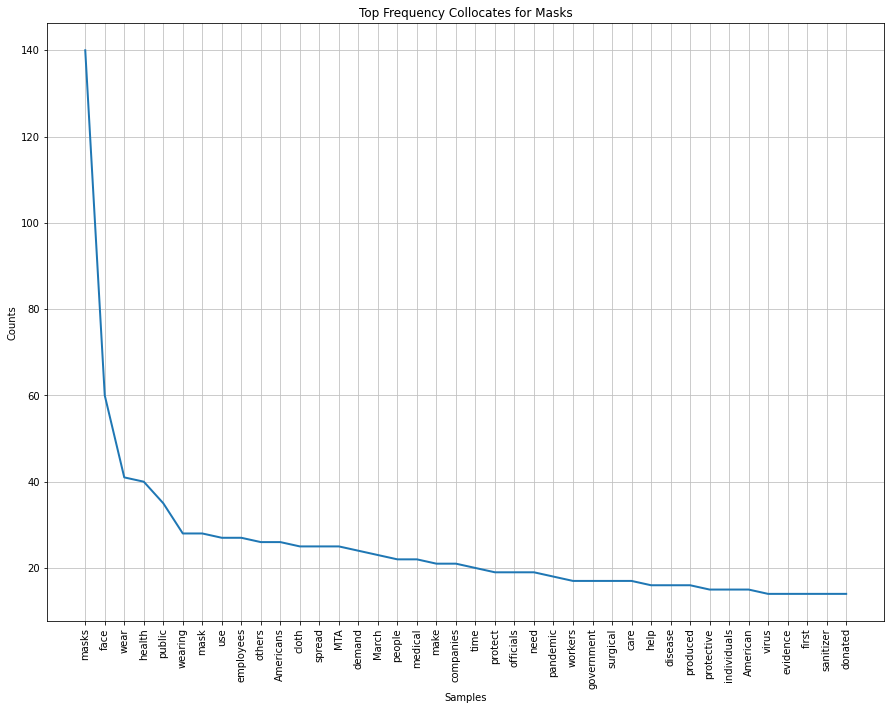

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 11))  # the size you want
tokenDist.plot(40, title="Top Frequency Collocates for " + word2find.capitalize())